In [1]:
import ioutils 
import matplotlib.pyplot as plt
from esm.models.esm3 import ESM3
from esm.sdk.api import ESMProtein, GenerationConfig
import torch
import numpy as np
import pickle

/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## test VESM

In [1]:
import argparse
import json
import os

import numpy as np
import torch
import importlib
import trainUtils
importlib.reload(trainUtils)

/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'trainUtils' from '/home/tyfei/evoModel/trainUtils.py'>

In [16]:
import pickle
with open("/data/tyfei/datasets/covid/ori_seq.pkl", "rb") as f:
    seq = pickle.load(f)
seq.keys()
mapping = {'nsp12': 'NSP12',
 'n': 'N',
 'nsp13': 'NSP13',
 's': 'Spike',
 'nsp5': 'NSP5',
 'nsp3': 'NSP3',
 'e': 'E',
 'nsp6': 'NSP6',
 'nsp4': 'NSP4',
 'nsp16': 'NSP16',
 'nsp7': 'NSP7',
 'nsp11': 'NSP11',
 'm': 'M',
 'nsp14': 'NSP14',
 'nsp9': 'NSP9',
 'nsp8': 'NSP8',
 'nsp2': 'NSP2',
 'nsp15': 'NSP15',
 'nsp10': 'NSP10'}

In [17]:
new_seq = {} 
for i in seq:
    new_seq[mapping[i]] = seq[i]
with open("/data/tyfei/datasets/covid/ori_seq2.pkl", "wb") as f:
    pickle.dump(new_seq, f)

In [2]:
path = "/data2/tyfei/trainresults/evomodel/test"
with open(os.path.join(path, "config.json"), "r") as f:
    configs = json.load(f)

In [3]:
pretrain_model = trainUtils.loadPretrainModel(configs)

In [4]:
model = trainUtils.buildModel(configs, pretrain_model)

In [5]:
ds = trainUtils.loadDataset(configs)

Seed set to 1509


In [6]:
dl = ds.train_dataloader()
for i, j in enumerate(dl):
    print(i)
    print(j)
    break

get train loader
0
[{'input': {'Spike': tensor([[ 0, 20, 18,  ..., 19, 11,  2]])}, 'ori_seq': {'Spike': tensor([[ 0, 20, 18,  ..., 19, 11,  2]])}, 'stage_1_masks': {'Spike': tensor([[1, 1, 1,  ..., 1, 1, 1]], dtype=torch.int32)}, 'label': {'Spike': [tensor([1])]}, 'meta': {'id': ['EPI_ISL_4421470'], 'bin': tensor([378]), 'days': tensor([385])}}, {'input': {'Spike': tensor([[ 0, 20, 18,  ..., 19, 11,  2]])}, 'ori_seq': {'Spike': tensor([[ 0, 20, 18,  ..., 19, 11,  2]])}, 'stage_1_masks': {'Spike': tensor([[1, 1, 1,  ..., 1, 1, 1]], dtype=torch.int32)}, 'label': {'Spike': [tensor([1])]}, 'meta': {'id': ['EPI_ISL_9767438'], 'bin': tensor([777]), 'days': tensor([778])}}]


In [7]:
a1, a2 = j

In [8]:
a2["label"]

{'Spike': [tensor([1])]}

In [9]:
model.training_step(j, 1)

tensor(8.6534, grad_fn=<AddBackward0>)

In [7]:
a = {"1":"1"}
a.get("2", "2")

'2'

In [18]:
with open('/data2/tyfei/COVID/20241209/allprot1204/Denmark/data.pkl', 'rb') as f:
    all_seqs = pickle.load(f)
new_seqs = []
t = list(all_seqs.keys()) 
for i in range(len(all_seqs["id"])):
    new_sample = {} 
    for j in t:
        new_sample[j] = all_seqs[j][i]
    new_seqs.append(new_sample)
with open('/data2/tyfei/COVID/20241209/allprot1204/Denmark/data2.pkl', 'wb') as f:
    pickle.dump(new_seqs, f)


In [10]:
np.array(True, dtype=int)

array(1)

## write fasta

In [3]:
seqs = ioutils.readFasta("/data2/tyfei/COVID/20241209/allprot1204/allprot1204.fasta")
allprots = ['E', 'M', 'N', 'NS3', 'NS6', 'NS7a', 'NS7b', 'NS8', 'NS9b', 'NS9c',
       'NSP1', 'NSP10', 'NSP11', 'NSP12', 'NSP13', 'NSP14', 'NSP15',
       'NSP16', 'NSP2', 'NSP3', 'NSP4', 'NSP5', 'NSP6', 'NSP7', 'NSP8',
       'NSP9', 'Spike']
def get_new():
    ret = {} 
    for i in allprots:
        ret[i] = "" 
    ret["cnt"] = 0 
    return ret
files = {} 
for i in allprots:
    files[i] = open("/data2/tyfei/COVID/20241209/allprot1204/"+i+".fasta", "w")

In [25]:
t1 = [] 
t2 = [] 
t3 = []
seqs = ioutils.readFasta("/data2/tyfei/COVID/20241209/allprot1204/E.fasta")
t1 = [s[0] for s in seqs] 
seqs = ioutils.readFasta("/data2/tyfei/COVID/20241209/allprot1204/Spike.fasta")
t2 = [s[0] for s in seqs] 
seqs = ioutils.readFasta("/data2/tyfei/COVID/20241209/allprot1204/M.fasta")
t3 = [s[0] for s in seqs] 


In [26]:
len(t1), len(t2), len(t3)

(15689982, 15690005, 15689991)

In [27]:
t1[15689981], t2[15689981], t3[15689981]

('EPI_ISL_19518513', 'EPI_ISL_19518513', 'EPI_ISL_19518513')

In [ ]:
cnt = 0
get_time = ioutils.getDate()
seq_id = [] 
date_time = []
days = []
region = []
res = get_new()
now_id = ""
infos = []
for seq in seqs:
    # print(seq)
    cnt += 1 
    info = seq[0].split("|")
    if not info[3].startswith("EPI"):
        continue 
    if info[3] != now_id:
        
        if res["cnt"] == len(allprots):
            for i in allprots:
                files[i].write(">"+now_id+"\n")
                files[i].write(res[i]+"\n")
                
            seq_id.append(infos[3])
            days.append(infos[2])
            date_time.append(infos[1])
            region.append(infos[0])
        now_id = info[3]
        infos = [info[-1], info[2], get_time(info[2]), info[3]]
        res = get_new()   
    prot = info[0]
    if res[prot] != "":
        continue
    else:
        res[prot] = seq[1]
        if res[prot] != "":
            res["cnt"] = res["cnt"] + 1
        
    if cnt % 10000 == 0:
        print(cnt)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

In [5]:
import pandas as pd
df = pd.DataFrame({"seq_id": seq_id, "date": date_time, "days": days, "region": region})
df.to_csv("/data2/tyfei/COVID/20241209/allprot1204/meta.csv", index=False)
df.head()

,seq_id,date,days,region
0,EPI_ISL_402124,2019-12-30,29,China
1,EPI_ISL_2155626,2020-12-23,388,Philippines
2,EPI_ISL_940774,2021-01-22,418,Belgium
3,EPI_ISL_1179245,2021-02-24,451,United Kingdom
4,EPI_ISL_1178570,2021-02-26,453,United Kingdom


## prepare data by country

In [1]:
import pandas as pd 
import ioutils
SAMPLE_SIZE = 100 
SEED = 1509 
df = pd.read_csv("/data2/tyfei/COVID/20241209/allprot1204/meta.csv", header=0)
df.head()

,seq_id,date,days,region
0,EPI_ISL_402124,2019-12-30,29,China
1,EPI_ISL_2155626,2020-12-23,388,Philippines
2,EPI_ISL_940774,2021-01-22,418,Belgium
3,EPI_ISL_1179245,2021-02-24,451,United Kingdom
4,EPI_ISL_1178570,2021-02-26,453,United Kingdom


In [2]:
df["region"].value_counts()[:10]

region
USA               4837203
United Kingdom    3068792
Germany            908620
Denmark            659682
Japan              622549
France             612165
Canada             579386
India              268892
Sweden             262401
Spain              236664
Name: count, dtype: int64

In [3]:
required = {"USA":"USA", "UK":"United Kingdom", "Germany":"Germany", "Denmark":"Denmark", "Japan":"Japan", "France":"France", "Canada":"Canada"}
required = {"Denmark":"Denmark", "Japan":"Japan", "France":"France", "Canada":"Canada"}
len(required)

4

In [19]:
from esm.models.esmc import ESMC
import numpy as np
import ioutils
from esm.sdk.api import ESMProtein, LogitsConfig
import warnings
warnings.filterwarnings("ignore")
model = ESMC.from_pretrained("esmc_600m")

In [21]:
allprots = ['E', 'M', 'N', 'NS3', 'NS6', 'NS7a', 'NS7b', 'NS8', 'NS9b', 'NS9c',
        'NSP1', 'NSP10', 'NSP11', 'NSP12', 'NSP13', 'NSP14', 'NSP15',
        'NSP16', 'NSP2', 'NSP3', 'NSP4', 'NSP5', 'NSP6', 'NSP7', 'NSP8',
        'NSP9', 'Spike']
ori_seqs = {}
files = {} 
for i in allprots:
    files[i] = ioutils.readFasta("/data2/tyfei/COVID/20241209/allprot1204/"+i+".fasta")
    q = files[i].__next__()
    protein = ESMProtein(sequence=q[1])
    res_s = model.encode(protein)
    ori_seqs[i] = res_s.sequence.cpu().numpy()
ori_seqs


{'E': array([ 0, 20, 19,  8, 18,  7,  8,  9,  9, 11,  6, 11,  4, 12,  7, 17,  8,
         7,  4,  4, 18,  4,  5, 18,  7,  7, 18,  4,  4,  7, 11,  4,  5, 12,
         4, 11,  5,  4, 10,  4, 23,  5, 19, 23, 23, 17, 12,  7, 17,  7,  8,
         4,  7, 15, 14,  8, 18, 19,  7, 19,  8, 10,  7, 15, 17,  4, 17,  8,
         8, 10,  7, 14, 13,  4,  4,  7,  2]),
 'M': array([ 0, 20,  5, 13,  8, 17,  6, 11, 12, 11,  7,  9,  9,  4, 15, 15,  4,
         4,  9, 16, 22, 17,  4,  7, 12,  6, 18,  4, 18,  4, 11, 22, 12, 23,
         4,  4, 16, 18,  5, 19,  5, 17, 10, 17, 10, 18,  4, 19, 12, 12, 15,
         4, 12, 18,  4, 22,  4,  4, 22, 14,  7, 11,  4,  5, 23, 18,  7,  4,
         5,  5,  7, 19, 10, 12, 17, 22, 12, 11,  6,  6, 12,  5, 12,  5, 20,
         5, 23,  4,  7,  6,  4, 20, 22,  4,  8, 19, 18, 12,  5,  8, 18, 10,
         4, 18,  5, 10, 11, 10,  8, 20, 22,  8, 18, 17, 14,  9, 11, 17, 12,
         4,  4, 17,  7, 14,  4, 21,  6, 11, 12,  4, 11, 10, 14,  4,  4,  9,
         8,  9,  4,  7, 12,  6, 

In [22]:
with open('/data2/tyfei/COVID/20241209/allprot1204/Denmark/data3.pkl', 'wb') as f:
    pickle.dump(ori_seqs, f)


In [23]:
with open("/data/tyfei/datasets/covid/ori_seq3.pkl", "wb") as f:
    pickle.dump(ori_seqs, f)

In [5]:
def getData(ids, name="USA"):
    df_USA = df[df["region"] == name] 
    df_USA["bin"] = pd.cut(df_USA["days"], bins=range(0, np.max(df_USA["days"]+6), 7), labels=[str(i) for i in range(0, np.max(df_USA["days"])+6, 7)[:-1]])
    df_USA = df_USA.dropna(axis=0)
    df_USA["bin"] = df_USA["bin"].astype(int)
    df_USA.head()
    
    # df_USA = df_USA.groupby('bin', group_keys=False).apply(lambda x: x.sample(min(len(x), SAMPLE_SIZE), random_state=SEED))
    df_USA = df_USA.set_index("seq_id")
    df_USA = df_USA.sort_index()
    # df_USA.head()
    print(df_USA.head())
    allprots = ['E', 'M', 'N', 'NS3', 'NS6', 'NS7a', 'NS7b', 'NS8', 'NS9b', 'NS9c',
        'NSP1', 'NSP10', 'NSP11', 'NSP12', 'NSP13', 'NSP14', 'NSP15',
        'NSP16', 'NSP2', 'NSP3', 'NSP4', 'NSP5', 'NSP6', 'NSP7', 'NSP8',
        'NSP9', 'Spike']
    files = {} 
    for i in allprots:
        files[i] = ioutils.readFasta("/data2/tyfei/COVID/20241209/allprot1204/"+i+".fasta")

    res = {i:[] for i in allprots}
    res["id"] = [] 
    res["days"] = [] 
    res["bin"] = [] 
    s = set(df_USA.index) 
    try:
        cnt = 0
        cnt1 = 0
        while True:
            name = ""
            newdata = {}
            for i in allprots:
                q = files[i].__next__()
                if name == "":
                    name = q[0]
                else:
                    if name != q[0]:
                        name = "fail" 
                newdata[i] = q[1]
            if name in s:
                cnt1 += 1
                res["id"].append(name)
                res["days"].append(df_USA.loc[name]["days"])
                res["bin"].append(df_USA.loc[name]["bin"])
                for i in allprots:
                    protein = ESMProtein(sequence=newdata[i])
                    res_s = model.encode(protein)
                    res[i].append(res_s.sequence.cpu().numpy())
            cnt += 1 
            if cnt % 100000 == 0:
                print(cnt, cnt1)
    except StopIteration:
        print("Generator has reached its end.")
        
    print(cnt, cnt1)
    return res

In [6]:
import pickle
for file, name in required.items():
    print(name)
    res = getData(file, name)
    with open("/data2/tyfei/COVID/20241209/allprot1204/%s/data_full.pkl"%file, "wb") as f:
        pickle.dump(res, f)

Denmark
                        date  days   region  bin
seq_id                                          
EPI_ISL_10010955  2022-02-07   799  Denmark  798
EPI_ISL_10010956  2022-02-11   803  Denmark  798
EPI_ISL_10010958  2022-02-11   803  Denmark  798
EPI_ISL_10010960  2022-02-05   797  Denmark  791
EPI_ISL_10010962  2022-02-04   796  Denmark  791
100000 0
200000 0
300000 0
400000 0
500000 0
600000 36104
700000 41433
800000 47067
900000 51173
1000000 54276
1100000 57181
1200000 64396
1300000 68063
1400000 73165
1500000 73380
1600000 73380
1700000 74806
1800000 74838
1900000 87689
2000000 102088
2100000 109387
2200000 115957
2300000 116790
2400000 123790
2500000 131250
2600000 136803
2700000 140067
2800000 144550
2900000 147696
3000000 151474
3100000 155208
3200000 157427
3300000 160724
3400000 162121
3500000 163318
3600000 165192
3700000 166001
3800000 167604
3900000 169681
4000000 170012
4100000 172052
4200000 173133
4300000 174585
4400000 177271
4500000 180058
4600000 182752
4700000

In [1]:
import torch 
a = torch.randn(2, 3)
b = torch.tensor(((-1, -1, 2),(-1,3, -1.0)))
a[b>0] = b[b>0]
a

tensor([[-1.4002, -0.7491,  2.0000],
        [-0.0622,  3.0000, -1.3285]])

In [ ]:
with open("/data2/tyfei/COVID/20241209/allprot1204/USA/data.pkl", "wb") as f:
    pickle.dump(res, f)

In [40]:
{i:i+1 for i in range(10)}

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10}

In [ ]:
for i, r in df_USA.groupby("bin"):
    print(i, len(r))

28 1501
42 10
49 15
56 12
63 22
70 8
77 33
84 369
91 699
98 3132
105 5141
112 5069
119 5586
126 4213
133 3790
140 3371
147 3717
154 3375
161 3094
168 2587
175 2501
182 2592
189 2861
196 4223
203 4587
210 4824
217 6478
224 5569
231 4816
238 4434
245 3911
252 3597
259 3411
266 3840
273 3420
280 3290
287 4141
294 4485
301 4354
308 6352
315 5438
322 6105
329 7650
336 10822
343 9651
350 8555
357 6615
364 11258
371 14048
378 12780
385 10237
392 19370
399 21615
406 22478
413 19848
420 18757
427 22179
434 22561
441 18580
448 21016
455 25167
462 25959
469 31027
476 33502
483 40511
490 42854
497 41133
504 35796
511 36645
518 30464
525 23158
532 18399
539 12732
546 10527
553 11206
560 11084
567 12971
574 17001
581 25494
588 36351
595 54874
602 77042
609 81919
616 70408
623 68494
630 70194
637 79078
644 75560
651 68224
658 59713
665 61561
672 61347
679 54510
686 55485
693 57058
700 62913
707 64666
714 62326
721 49860
728 72061
735 64804
742 76984
749 87697
756 124526
763 125392
770 113315
777 1049

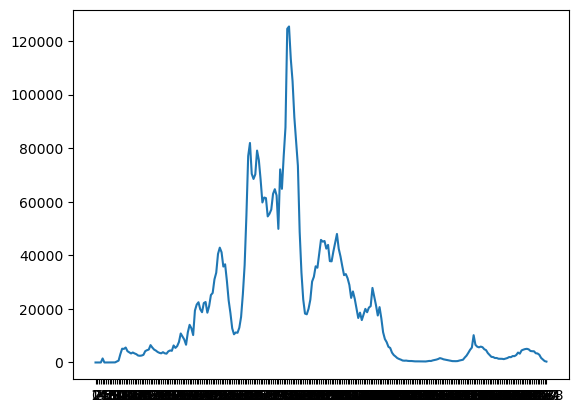

In [14]:
t = df_USA["bin"].value_counts()
t = t.sort_index()
plt.plot(t)

In [13]:
t

bin
0          0
7          0
14         0
21         0
28      1501
        ... 
1750    2879
1757    1706
1764    1098
1771     521
1778     331
Name: count, Length: 255, dtype: int64

In [2]:
df["region"].value_counts()[:10]

region
USA               4837203
United Kingdom    3068792
Germany            908620
Denmark            659682
Japan              622549
France             612165
Canada             579386
India              268892
Sweden             262401
Spain              236664
Name: count, dtype: int64

In [ ]:
import tensorboard

140159749567488

In [56]:
import numpy as np
a = np.array([1,2,3,4,5]) 
b = np.zeros(50000000)
id(a), id(b)

(140143573995600, 140143574001744)

In [11]:
import json 
import trainUtils
with open("/home/tyfei/evoModel/checkpoints/CrossGene/config.json") as f:
    configs = json.load(f)

In [12]:
pretrain_model = trainUtils.loadPretrainModel(configs)
model = trainUtils.buildModel(configs, pretrain_model, None)
ds = trainUtils.loadDataset(configs)

In [13]:
ckpt = torch.load("/home/tyfei/evoModel/checkpoints/CrossGene/last.ckpt")
ckpt

{'epoch': 6,
 'global_step': 66000,
 'pytorch-lightning_version': '2.3.3',
 'state_dict': OrderedDict([('encoder_blocks.0.mha.in_proj_weight',
               tensor([[ 2.9423e-09,  3.8021e-09, -1.2763e-15,  ..., -4.9468e-07,
                        -3.8817e-14,  2.5423e-17],
                       [-2.3318e-17,  6.9085e-18, -1.4310e-11,  ..., -5.7912e-17,
                        -2.9256e-09,  5.2831e-10],
                       [ 1.8825e-06,  1.4359e-11,  7.9189e-08,  ..., -7.8040e-14,
                         1.0228e-11, -1.0684e-15],
                       ...,
                       [ 7.8767e-10, -9.6251e-10,  2.6132e-11,  ...,  5.6801e-08,
                         7.2873e-11, -1.7570e-09],
                       [ 2.3838e-10,  6.0127e-10,  9.2258e-09,  ...,  1.9623e-08,
                        -7.5691e-10, -1.5764e-07],
                       [ 1.8984e-11, -2.7736e-06,  1.6988e-14,  ...,  8.7108e-14,
                         1.9360e-13, -3.5940e-12]], device='cuda:2')),
           

In [40]:
with open("/data/tyfei/datasets/covid/teststage2_lr_backbone_80000.pkl", "rb") as f:
    data = pickle.load(f)

In [43]:
q = [] 
for i in range(1000):
    t = [data[i]["S"], data[i]["E"], data[i]["NSP5"]]
    t = np.concatenate(t)
    q.append(t)
q

NameError: name 'np' is not defined

In [14]:
model.load_state_dict(ckpt["state_dict"], strict=False)
model = model.cuda(4)

In [18]:
model.only_embed = True

In [19]:
d = ds.val_dataloader()
q = []
labels = ["S"]*300+["NSP5"]*300+["E"]*300
with torch.no_grad():
    cnt = 0
    for i, j in enumerate(d):
        inputs = j[0]
        for i in inputs:
            inputs[i] = inputs[i].cuda(4)
        # labels.append(j[0]["prot"])
        # j[0]["seq_t"] = j[0]["seq_t"].cuda(4)
        res = model(inputs).cpu().squeeze().numpy()
        q.append(res)
        cnt += 1 
        if (cnt % 1000 == 0):
            break
    # break

In [20]:
from sklearn.decomposition import PCA
import numpy as np
q = np.stack(q, axis=0)
pca = PCA(n_components=20)
pca_seq = pca.fit_transform(q)
pca_seq.shape 
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(pca_seq)

In [27]:
labels = ["Full"]*1000
X_embedded.shape

(1000, 2)

In [30]:
df

,x,y,labels
0,-164.672653,133.753830,Full
1,-91.680458,160.027634,Full
2,-90.781723,152.466171,Full
3,-146.861862,-70.675011,Full
4,-184.108566,96.977150,Full
...,...,...,...
995,12.168350,-2.541945,Full
996,-149.316833,2.793270,Full
997,-149.316833,2.793270,Full
998,-149.316833,2.793270,Full


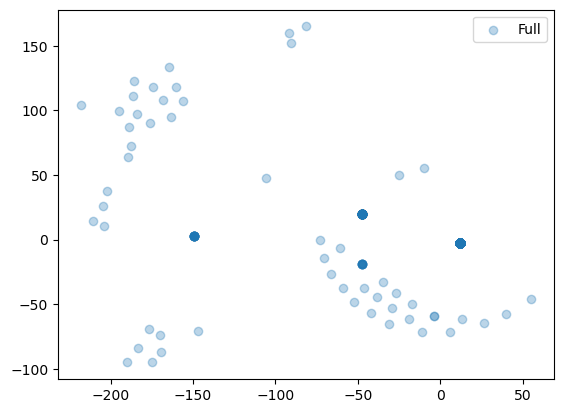

In [32]:
import pandas as pd
import matplotlib.pyplot as plt 
# labels = ["S"]*320+["NSP5"]*320+["E"]*320
df = pd.DataFrame({"x": X_embedded[:, 0], "y": X_embedded[:, 1], "labels": labels})
for i in ["Full"]:
    subdf = df[df["labels"] == i]
    plt.scatter(subdf["x"], subdf["y"], label=i, alpha=0.3)
plt.legend()

In [27]:
ori = {}

In [28]:
import pickle 
with open("/data/tyfei/datasets/covid/S_aln.pkl", "rb") as f:
    a = pickle.load(f) 
ori["S"] = a[0]["seq_t"]
with open("/data/tyfei/datasets/covid/E_aln.pkl", "rb") as f:
    a = pickle.load(f) 
ori["E"] = a[0]["seq_t"]
with open("/data/tyfei/datasets/covid/NSP5_aln.pkl", "rb") as f:
    a = pickle.load(f) 
ori["NSP5"] = a[0]["seq_t"]

In [33]:
with open("/data/tyfei/datasets/covid/S_aln.pkl", "rb") as f:
    a = pickle.load(f) 
a

[{'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,  2])},
 {'prot': 'S', 'seq_t': array([ 0, 20, 18, ..., 19, 11,

In [37]:
a[512]["seq_t"].shape, a[0]["seq_t"].shape

((1273,), (1275,))

In [9]:
with open("/data/tyfei/datasets/covid/ori_seq.pkl", "wb") as f:
    pickle.dump(ori, f)

NameError: name 'pickle' is not defined

In [27]:
q = [] 
res = model(j[0])
res.shape

torch.Size([1, 256])

In [12]:
import pickle
import os
import ioutils
seqs = ioutils.readFasta("/data/tyfei/datasets/covid/s_dict_20211206_20241005_common_sequences.fasta", checkseq=None)
# seqs

In [23]:
import pandas as pd
df = pd.read_csv("/data/tyfei/datasets/covid/full.csv", header=0, index_col=0)
df2 = df

/tmp/ipykernel_2659289/2596035799.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/data/tyfei/datasets/covid/full.csv", header=0, index_col=0)


In [13]:
i = [seq[0] for seq in seqs]
i, len(i)

(['OEAV21228893',
  'OEAV6351580',
  'OEAV22692345',
  'OEAV6376775',
  'OEAV22398934',
  'OEAV6382661',
  'OEAV5451516',
  'OEAV21772705',
  'OEAV21256101',
  'OEAV21980934',
  'OEAV21847496',
  'OEAV21314853',
  'OEAV6524093',
  'OEAV20610921',
  'OEAV19686959',
  'OEAV22509909',
  'OEAV21537406',
  'OEAV22405215',
  'OEAV22677261',
  'OEAV21787370',
  'OEAV22309650',
  'OEAV21842416',
  'OEAV22009041',
  'OEAV21603618',
  'OEAV22410871',
  'OEAV6525799',
  'OEAV5294389',
  'OEAV22234117',
  'OEAV21264252',
  'OEAV21790304',
  'OEAV6376886',
  'OEAV21256591',
  'OEAV6516322',
  'OEAV21960181',
  'OEAV6377912',
  'OEAV22498754',
  'OEAV21263076',
  'OEAV22431174',
  'OEAV21787826',
  'OEAV22526153',
  'OEAV22333387',
  'OEAV22007778',
  'OEAV22570793',
  'OEAV21516938',
  'OEAV5290028',
  'OEAV21517154',
  'OEAV21259670',
  'OEAV22423532',
  'OEAV22454389',
  'OEAV21761305',
  'OEAV19618929',
  'OEAV21978571',
  'OEAV22003457',
  'OEAV6113815',
  'OEAV6382601',
  'OEAV21055987',
  'OE

In [16]:
len(i)

462549

In [18]:
df.reindex(i).dropna()
df2 = df.reindex(i).dropna()
df2["new country"] = df2["country"].apply(lambda x: "United States" if x == "USA" else x)
df2

,release_date,country,is_recommend,new country
virus_id,,,,
OEAV21228893,2023-05-07,Spain,True,Spain
OEAV6351580,2022-01-26,United Kingdom,True,United Kingdom
OEAV22692345,2024-09-09,Puerto Rico,True,Puerto Rico
OEAV6376775,2022-01-24,United Kingdom,True,United Kingdom
OEAV22398934,2024-05-08,Denmark,True,Denmark
...,...,...,...,...
OEAV22419028,2024-04-26,Ireland,True,Ireland
OEAV21993229,2023-11-30,New Zealand,True,New Zealand
OEAV21072450,2023-04-03,Japan,True,Japan


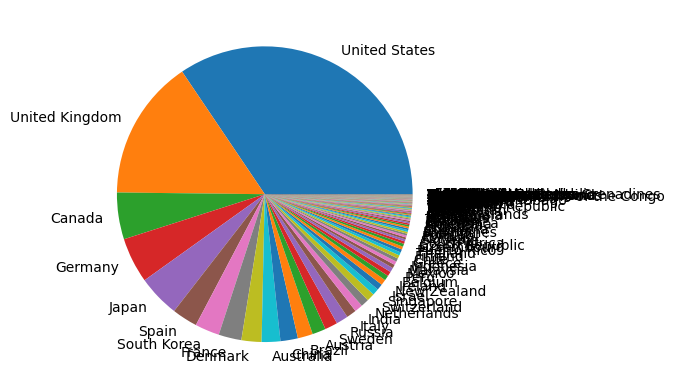

In [6]:
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rc('pdf', fonttype=42)
plt.pie(df["new country"].value_counts(), labels=df["new country"].value_counts().index)
plt.savefig("country.pdf")

In [ ]:
df = pd.read_csv("/data/tyfei/datasets/covid/allprot0505/", header=0, index_col=0)

In [ ]:
df = pd.read_csv("/data/tyfei/datasets/Mprot/fulldata.tsv", header=0, index_col=0, sep="\t")
df.head()

In [24]:
import ioutils 
get_time = ioutils.getDate()
df2["time"] = df2["release_date"].apply(get_time) 
df2["q"] = pd.cut(df2["time"], 100)

In [26]:
get_time("2022-4-5")

856

(array([245874., 132189.,  38914.,  61216., 264485., 111174.,  99314.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  14926., 140643.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  41573., 116950., 124909.,  97301., 106047.,
        140811.,  63551.,      0.,      0.,      0.,  40822.,  82363.,
         89578.,  57839.,  91866.,  58025.,  51814.,  46225.,  43385.,
         41731.,  32390.,  32579.,  30320.,  42532.,  22932.,  46992.,
         17631.,  32364.,  26823.,  44839.,  36978.,  44969.,  32035.,
         45624.,  32235.,  33172.,  29176.,  39605.,  33900.,  52012.,
         28355.,  34029.,  43535.,  31366.,  24662.,  27667.,  23027.,
         20174.,  16833.,  12077.,  17980.,  16181.,  31116.,  14044.,
          4661.,  12851.,  13304.,  13803.,  18202.,  18138.,  17581.,
         19721.,  18741.,  18755.,  19517.,  22440.,  14187.,  18705.,
      

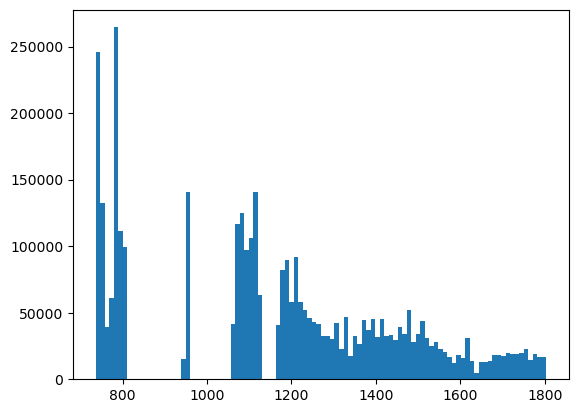

In [25]:
plt.hist(df2["time"], bins=100)
# plt.savefig("time.pdf")

In [4]:
import os
import pickle
ori_seqs = {}
get_time = ioutils.getDate()
for f in os.listdir("/data/tyfei/datasets/covid/"):
    if f.endswith("_dict_20211206_20241005_common_sequences.fasta"):
        print(f)
        seqs = ioutils.readFasta("/data/tyfei/datasets/covid/"+f, checkseq=None)
        name = f.split("_")[0]
        allres = [] 
        cnt = 0
        tt = -1
        for seq in seqs:
            if (cnt+1) % 100000 == 0:
                print(cnt)
            # if cnt > 6000000:
            #     break
            cnt += 1
            if tt == -1:
                tt = len(seq[1])
                print(tt)
                
            # print(seq)
            # info = seq[0].split("|")
            # if not info[3].startswith("EPI"):
            #     continue
            # if info[0] not in ["E", "NSP5", "Spike"]:
            #       continue
            t = seq[1]
            if len(seq[1]) < tt:
                t = t+"-"*(tt-len(t))
            protein = ESMProtein(sequence=t)
            res = model.encode(protein)
            data = {}
            data["prot"] = name
            # data["date"] = get_time(info[2])
            # data["country"] = info[-1]
            data["id"] = seq[0]
            data["seq_t"] = res.sequence.cpu().numpy()
            if name not in ori_seqs:
                ori_seqs[name] = data["seq_t"]
            allres.append(data)
        with open("/data/tyfei/datasets/covid/%s_paired_sequences.pkl"%name, "wb") as f:
            pickle.dump(allres, f)
    # print(data)
    # break

nsp12_dict_20211206_20241005_common_sequences.fasta
923
99999
199999
299999
399999
n_dict_20211206_20241005_common_sequences.fasta
416
99999
199999
299999
399999
nsp13_dict_20211206_20241005_common_sequences.fasta
601
99999
199999
299999
399999
s_dict_20211206_20241005_common_sequences.fasta
1273
99999
199999
299999
399999
nsp5_dict_20211206_20241005_common_sequences.fasta
306
99999
199999
299999
399999
nsp3_dict_20211206_20241005_common_sequences.fasta
1500
99999
199999
299999
399999
e_dict_20211206_20241005_common_sequences.fasta
75
99999
199999
299999
399999
nsp6_dict_20211206_20241005_common_sequences.fasta
287
99999
199999
299999
399999
nsp4_dict_20211206_20241005_common_sequences.fasta
500
99999
199999
299999
399999
nsp16_dict_20211206_20241005_common_sequences.fasta
298
99999
199999
299999
399999
nsp7_dict_20211206_20241005_common_sequences.fasta
83
99999
199999
299999
399999
nsp11_dict_20211206_20241005_common_sequences.fasta
9
99999
199999
299999
399999
m_dict_20211206_2024100

In [10]:
with open("/data/tyfei/datasets/covid/NSP5_aln.pkl", "wb") as f:
    pickle.dump(allres, f)

In [15]:
import pickle 
ori = {}
for i in ("/data/tyfei/datasets/covid/E_aln.pkl", "/data/tyfei/datasets/covid/NSP5_aln.pkl", "/data/tyfei/datasets/covid/S_aln.pkl"):
    with open(i, "rb") as f:
        a = pickle.load(f)
        print(len(a), a[0]["prot"])
        ori[a[0]["prot"]] = a[0]["seq_t"]

811124 E
811124 NSP5
811124 S


In [5]:
with open("/data/tyfei/datasets/covid/ori_seq.pkl", "wb") as f:
    pickle.dump(ori_seqs, f)

In [11]:
t1 = [] 
t2 = [] 
t3 = [] 
for i in os.listdir("/data/tyfei/datasets/covid/"):
    if i.endswith("_paired_sequences.pkl"):
        t1.append(500)
        t2.append(50)
        t3.append("/data/tyfei/datasets/covid/"+i)

In [14]:
t2

[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]

In [ ]:

len(allres)

833661

In [51]:
len(res)

78